## RQ2

What are the time slots with more passengers? Set your own time slots and discover which are those when Taxis drive the highest number of passengers overall New York and repeat the analysis for each borough. Provide the results through a visualization and comment them.

In [12]:
''' imports '''
import pandas as pd
import numpy as np
from loader import Loader
import matplotlib.pyplot as plt
%matplotlib inline

''' data paths '''
data = {
    'jan': {
        'path': 'data/yellow_tripdata_2018-01.csv',
        'start': '2018-01-01',
        'end': '2018-01-31'
    },
    'feb': {
        'path': 'data/yellow_tripdata_2018-02.csv',
        'start': '2018-02-01',
        'end': '2018-02-28'
    },
    'mar': {
        'path': 'data/yellow_tripdata_2018-03.csv',
        'start': '2018-03-01',
        'end': '2018-03-31'
    },
    'apr': {
        'path': 'data/yellow_tripdata_2018-04.csv',
        'start': '2018-04-01',
        'end': '2018-04-30'
    },
    'may': {
        'path': 'data/yellow_tripdata_2018-05.csv',
        'start': '2018-05-01',
        'end': '2018-05-31'
    },
    'jun': {
        'path': 'data/yellow_tripdata_2018-06.csv',
        'start': '2018-06-01',
        'end': '2018-06-30'
    }
}
locations = 'data/taxi_zone_lookup.csv'

# make it dynamic
MONTH = data['jan']

Let's use a Loader class, created ad hoc, to simplify some operations

In [13]:
# read data for each month
# todo: combine all months together
loader = Loader(csv=MONTH['path'], chunksize=100000)

# preparing locations to be merged on-the-fly when iterating
loader.merge(csv=locations, usecols=['LocationID', 'Borough'], on=('PULocationID', 'LocationID'), direction='left', drop_on_columns=True)

# get data generator
data_iterator = loader.iterate(usecols=['tpep_pickup_datetime', 'passenger_count', 'PULocationID'], parse_dates=['tpep_pickup_datetime'], date_index='tpep_pickup_datetime')

In [14]:
# defining hourly time slots
h_slots = {str(x % 24) + ':00 ' + str(x % 24) + ':59': 0 for x in range(24)}

print(h_slots)

{'0:00 0:59': 0, '1:00 1:59': 0, '2:00 2:59': 0, '3:00 3:59': 0, '4:00 4:59': 0, '5:00 5:59': 0, '6:00 6:59': 0, '7:00 7:59': 0, '8:00 8:59': 0, '9:00 9:59': 0, '10:00 10:59': 0, '11:00 11:59': 0, '12:00 12:59': 0, '13:00 13:59': 0, '14:00 14:59': 0, '15:00 15:59': 0, '16:00 16:59': 0, '17:00 17:59': 0, '18:00 18:59': 0, '19:00 19:59': 0, '20:00 20:59': 0, '21:00 21:59': 0, '22:00 22:59': 0, '23:00 23:59': 0}


In [15]:
# declaring two counters for enhance verbosity
tot_rows = 0
processed_rows = 0

# iterate over chunks
for i, d in enumerate(data_iterator):
    
    # info
    tot_rows += len(d.index)
    
    # remove older or newer items keeping only the ones
    # strictly related to the considered month
    d = d.loc[MONTH['start'] : MONTH['end']]
    
    # drop any row with missing values
    d = d.dropna()
    
    # processing each time span (slot)
    for time_span, count in h_slots.items():
        h_start, h_end = time_span.split(' ')
        
        # filter DataFrame by time span
        f = d.between_time(h_start, h_end)
        
        # info
        processed_rows += len(f.index)
        
        # compute and save the sum for this chunk
        h_slots[time_span] += f['passenger_count'].sum()

print(str(processed_rows) + ' over ' + str(tot_rows) + ' rows have been processed')

Initial no. rows: 100000
Rows between 2018-01-01 - 2018-01-31: 99777
Removed NaN: 99777
Rows in 0:00 0:59: 16129
Rows in 1:00 1:59: 18719
Rows in 2:00 2:59: 16333
Rows in 3:00 3:59: 12418
Rows in 4:00 4:59: 8643
Rows in 5:00 5:59: 4167
Rows in 6:00 6:59: 3356
Rows in 7:00 7:59: 3350
Rows in 8:00 8:59: 3554
Rows in 9:00 9:59: 4796
Rows in 10:00 10:59: 6736
Rows in 11:00 11:59: 73
Rows in 12:00 12:59: 0
Rows in 13:00 13:59: 0
Rows in 14:00 14:59: 0
Rows in 15:00 15:59: 0
Rows in 16:00 16:59: 0
Rows in 17:00 17:59: 0
Rows in 18:00 18:59: 2
Rows in 19:00 19:59: 3
Rows in 20:00 20:59: 1
Rows in 21:00 21:59: 1
Rows in 22:00 22:59: 1
Rows in 23:00 23:59: 2
Initial no. rows: 100000
Rows between 2018-01-01 - 2018-01-31: 100000
Removed NaN: 100000
Rows in 0:00 0:59: 0
Rows in 1:00 1:59: 0
Rows in 2:00 2:59: 1
Rows in 3:00 3:59: 3
Rows in 4:00 4:59: 0
Rows in 5:00 5:59: 0
Rows in 6:00 6:59: 2
Rows in 7:00 7:59: 16
Rows in 8:00 8:59: 6
Rows in 9:00 9:59: 47
Rows in 10:00 10:59: 100
Rows in 11:00 1

Initial no. rows: 100000
Rows between 2018-01-01 - 2018-01-31: 100000
Removed NaN: 100000
Rows in 0:00 0:59: 24
Rows in 1:00 1:59: 0
Rows in 2:00 2:59: 0
Rows in 3:00 3:59: 0
Rows in 4:00 4:59: 0
Rows in 5:00 5:59: 0
Rows in 6:00 6:59: 0
Rows in 7:00 7:59: 8
Rows in 8:00 8:59: 1
Rows in 9:00 9:59: 5
Rows in 10:00 10:59: 0
Rows in 11:00 11:59: 1
Rows in 12:00 12:59: 1
Rows in 13:00 13:59: 8
Rows in 14:00 14:59: 5
Rows in 15:00 15:59: 41
Rows in 16:00 16:59: 947
Rows in 17:00 17:59: 16883
Rows in 18:00 18:59: 18120
Rows in 19:00 19:59: 17861
Rows in 20:00 20:59: 13541
Rows in 21:00 21:59: 13167
Rows in 22:00 22:59: 13963
Rows in 23:00 23:59: 3830
Initial no. rows: 100000
Rows between 2018-01-01 - 2018-01-31: 99998
Removed NaN: 99998
Rows in 0:00 0:59: 11787
Rows in 1:00 1:59: 9527
Rows in 2:00 2:59: 7483
Rows in 3:00 3:59: 5635
Rows in 4:00 4:59: 3417
Rows in 5:00 5:59: 1713
Rows in 6:00 6:59: 2437
Rows in 7:00 7:59: 3456
Rows in 8:00 8:59: 5717
Rows in 9:00 9:59: 8604
Rows in 10:00 10:5

Initial no. rows: 100000
Rows between 2018-01-01 - 2018-01-31: 100000
Removed NaN: 100000
Rows in 0:00 0:59: 2
Rows in 1:00 1:59: 0
Rows in 2:00 2:59: 0
Rows in 3:00 3:59: 0
Rows in 4:00 4:59: 1
Rows in 5:00 5:59: 11
Rows in 6:00 6:59: 12
Rows in 7:00 7:59: 23
Rows in 8:00 8:59: 9
Rows in 9:00 9:59: 19
Rows in 10:00 10:59: 0
Rows in 11:00 11:59: 3
Rows in 12:00 12:59: 214
Rows in 13:00 13:59: 14686
Rows in 14:00 14:59: 15996
Rows in 15:00 15:59: 15961
Rows in 16:00 16:59: 14734
Rows in 17:00 17:59: 17180
Rows in 18:00 18:59: 19382
Rows in 19:00 19:59: 110
Rows in 20:00 20:59: 1
Rows in 21:00 21:59: 0
Rows in 22:00 22:59: 0
Rows in 23:00 23:59: 0
Initial no. rows: 100000
Rows between 2018-01-01 - 2018-01-31: 100000
Removed NaN: 100000
Rows in 0:00 0:59: 8725
Rows in 1:00 1:59: 2759
Rows in 2:00 2:59: 8
Rows in 3:00 3:59: 0
Rows in 4:00 4:59: 0
Rows in 5:00 5:59: 8
Rows in 6:00 6:59: 10
Rows in 7:00 7:59: 5
Rows in 8:00 8:59: 0
Rows in 9:00 9:59: 11
Rows in 10:00 10:59: 0
Rows in 11:00 1

Initial no. rows: 100000
Rows between 2018-01-01 - 2018-01-31: 100000
Removed NaN: 100000
Rows in 0:00 0:59: 4356
Rows in 1:00 1:59: 2564
Rows in 2:00 2:59: 1451
Rows in 3:00 3:59: 1077
Rows in 4:00 4:59: 1355
Rows in 5:00 5:59: 3075
Rows in 6:00 6:59: 8349
Rows in 7:00 7:59: 11415
Rows in 8:00 8:59: 76
Rows in 9:00 9:59: 0
Rows in 10:00 10:59: 2
Rows in 11:00 11:59: 3
Rows in 12:00 12:59: 0
Rows in 13:00 13:59: 10
Rows in 14:00 14:59: 8
Rows in 15:00 15:59: 9
Rows in 16:00 16:59: 58
Rows in 17:00 17:59: 112
Rows in 18:00 18:59: 7422
Rows in 19:00 19:59: 14663
Rows in 20:00 20:59: 12127
Rows in 21:00 21:59: 11797
Rows in 22:00 22:59: 10840
Rows in 23:00 23:59: 7672
Initial no. rows: 100000
Rows between 2018-01-01 - 2018-01-31: 99999
Removed NaN: 99999
Rows in 0:00 0:59: 0
Rows in 1:00 1:59: 0
Rows in 2:00 2:59: 0
Rows in 3:00 3:59: 0
Rows in 4:00 4:59: 1
Rows in 5:00 5:59: 17
Rows in 6:00 6:59: 57
Rows in 7:00 7:59: 3662
Rows in 8:00 8:59: 18386
Rows in 9:00 9:59: 16823
Rows in 10:00 1

Initial no. rows: 100000
Rows between 2018-01-01 - 2018-01-31: 100000
Removed NaN: 100000
Rows in 0:00 0:59: 14240
Rows in 1:00 1:59: 11411
Rows in 2:00 2:59: 9368
Rows in 3:00 3:59: 6662
Rows in 4:00 4:59: 4134
Rows in 5:00 5:59: 2199
Rows in 6:00 6:59: 3010
Rows in 7:00 7:59: 4468
Rows in 8:00 8:59: 7558
Rows in 9:00 9:59: 10967
Rows in 10:00 10:59: 1923
Rows in 11:00 11:59: 13
Rows in 12:00 12:59: 9
Rows in 13:00 13:59: 0
Rows in 14:00 14:59: 0
Rows in 15:00 15:59: 3
Rows in 16:00 16:59: 2
Rows in 17:00 17:59: 12
Rows in 18:00 18:59: 18
Rows in 19:00 19:59: 13
Rows in 20:00 20:59: 7
Rows in 21:00 21:59: 83
Rows in 22:00 22:59: 5822
Rows in 23:00 23:59: 16401
Initial no. rows: 100000
Rows between 2018-01-01 - 2018-01-31: 100000
Removed NaN: 100000
Rows in 0:00 0:59: 2
Rows in 1:00 1:59: 0
Rows in 2:00 2:59: 0
Rows in 3:00 3:59: 2
Rows in 4:00 4:59: 21
Rows in 5:00 5:59: 4
Rows in 6:00 6:59: 11
Rows in 7:00 7:59: 14
Rows in 8:00 8:59: 10
Rows in 9:00 9:59: 138
Rows in 10:00 10:59: 111

Initial no. rows: 100000
Rows between 2018-01-01 - 2018-01-31: 99995
Removed NaN: 99995
Rows in 0:00 0:59: 0
Rows in 1:00 1:59: 0
Rows in 2:00 2:59: 0
Rows in 3:00 3:59: 0
Rows in 4:00 4:59: 1
Rows in 5:00 5:59: 14
Rows in 6:00 6:59: 31
Rows in 7:00 7:59: 17
Rows in 8:00 8:59: 1
Rows in 9:00 9:59: 6
Rows in 10:00 10:59: 7
Rows in 11:00 11:59: 1
Rows in 12:00 12:59: 9
Rows in 13:00 13:59: 18
Rows in 14:00 14:59: 8
Rows in 15:00 15:59: 24
Rows in 16:00 16:59: 619
Rows in 17:00 17:59: 18436
Rows in 18:00 18:59: 21391
Rows in 19:00 19:59: 20854
Rows in 20:00 20:59: 20224
Rows in 21:00 21:59: 16601
Rows in 22:00 22:59: 84
Rows in 23:00 23:59: 0
Initial no. rows: 100000
Rows between 2018-01-01 - 2018-01-31: 100000
Removed NaN: 100000
Rows in 0:00 0:59: 6969
Rows in 1:00 1:59: 3927
Rows in 2:00 2:59: 2505
Rows in 3:00 3:59: 1578
Rows in 4:00 4:59: 1562
Rows in 5:00 5:59: 2997
Rows in 6:00 6:59: 8376
Rows in 7:00 7:59: 15112
Rows in 8:00 8:59: 18296
Rows in 9:00 9:59: 3379
Rows in 10:00 10:59:

Initial no. rows: 100000
Rows between 2018-01-01 - 2018-01-31: 100000
Removed NaN: 100000
Rows in 0:00 0:59: 4359
Rows in 1:00 1:59: 3031
Rows in 2:00 2:59: 2236
Rows in 3:00 3:59: 1795
Rows in 4:00 4:59: 1827
Rows in 5:00 5:59: 3150
Rows in 6:00 6:59: 7849
Rows in 7:00 7:59: 3920
Rows in 8:00 8:59: 53
Rows in 9:00 9:59: 22
Rows in 10:00 10:59: 8
Rows in 11:00 11:59: 0
Rows in 12:00 12:59: 0
Rows in 13:00 13:59: 2
Rows in 14:00 14:59: 5
Rows in 15:00 15:59: 10
Rows in 16:00 16:59: 161
Rows in 17:00 17:59: 11203
Rows in 18:00 18:59: 13522
Rows in 19:00 19:59: 11405
Rows in 20:00 20:59: 9858
Rows in 21:00 21:59: 9295
Rows in 22:00 22:59: 7932
Rows in 23:00 23:59: 6723
Initial no. rows: 100000
Rows between 2018-01-01 - 2018-01-31: 100000
Removed NaN: 100000
Rows in 0:00 0:59: 0
Rows in 1:00 1:59: 1
Rows in 2:00 2:59: 0
Rows in 3:00 3:59: 5
Rows in 4:00 4:59: 3
Rows in 5:00 5:59: 18
Rows in 6:00 6:59: 106
Rows in 7:00 7:59: 9291
Rows in 8:00 8:59: 15524
Rows in 9:00 9:59: 14255
Rows in 10:

In [16]:
print(sorted(h_slots.items(), reverse=True, key=lambda kv: kv[1]))

[('18:00 18:59', 910552), ('19:00 19:59', 866281), ('17:00 17:59', 818167), ('15:00 15:59', 780750), ('20:00 20:59', 766281), ('21:00 21:59', 764803), ('14:00 14:59', 756207), ('16:00 16:59', 731569), ('22:00 22:59', 711463), ('13:00 13:59', 709101), ('12:00 12:59', 703595), ('11:00 11:59', 658362), ('9:00 9:59', 645960), ('8:00 8:59', 642797), ('10:00 10:59', 632634), ('23:00 23:59', 556738), ('7:00 7:59', 509986), ('0:00 0:59', 423137), ('1:00 1:59', 308349), ('6:00 6:59', 292168), ('2:00 2:59', 232528), ('3:00 3:59', 167836), ('5:00 5:59', 130590), ('4:00 4:59', 128952)]


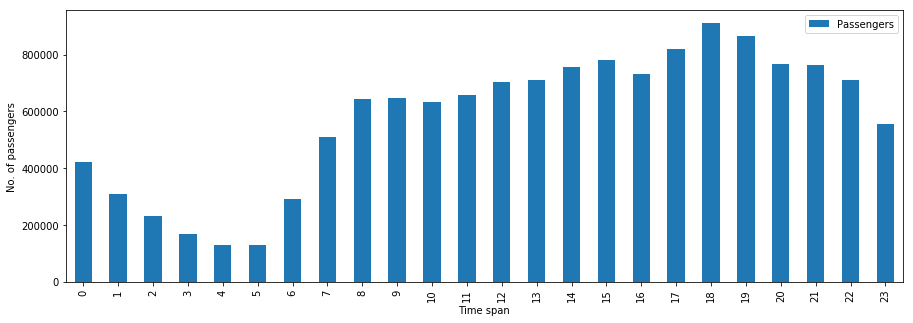

In [21]:
# create a DataFrame to easily be plotted
df = pd.DataFrame(list(h_slots.items()), columns=['HHSlots', 'Passengers'], index=list(range(24)))

# plotting...
figure, axes = plt.subplots(figsize=(15,5))
axes.set(xlabel='Time span', ylabel='No. of passengers')

# fill the axes X with the right names
df.plot.bar(ax=axes)